In this notebook, we are going to perform the ostensive analysis of the dataset:
    
_"New York City Airbnb Open Data"_ , available at:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data#AB_NYC_2019.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [50]:
data = pd.read_csv('new-york-city-airbnb-open-data/AB_NYC_2019.csv')

Printing the first examples:

In [9]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Printing the columns of the dataset, as well as their types. This is an important step because depending of the type of 
data that we have, the treatment that we have to perform differs.

In [11]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [22]:
data.loc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                     40.6475
longitude                                                   -73.9724
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [24]:
data.iloc[0,:2]

id                                    2539
name    Clean & quiet apt home by the park
Name: 0, dtype: object

## Statistical Analysis

In [76]:
data[data.price<=0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


As we look through the dataset, we can see that there are some cases where the price is 0, which is something strange
and must be investigated.

By looking at other features, it is possible to deduce some of the causes:

For example, in samples 25433 and 25796 it is probably an error, because the apartment has received many guests trought the time of observation;

Sample 26259 on the other hand, has not yet been rented. But it's price could be estimated by location and quality
of the house.

Some statistics on the price:

In [52]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

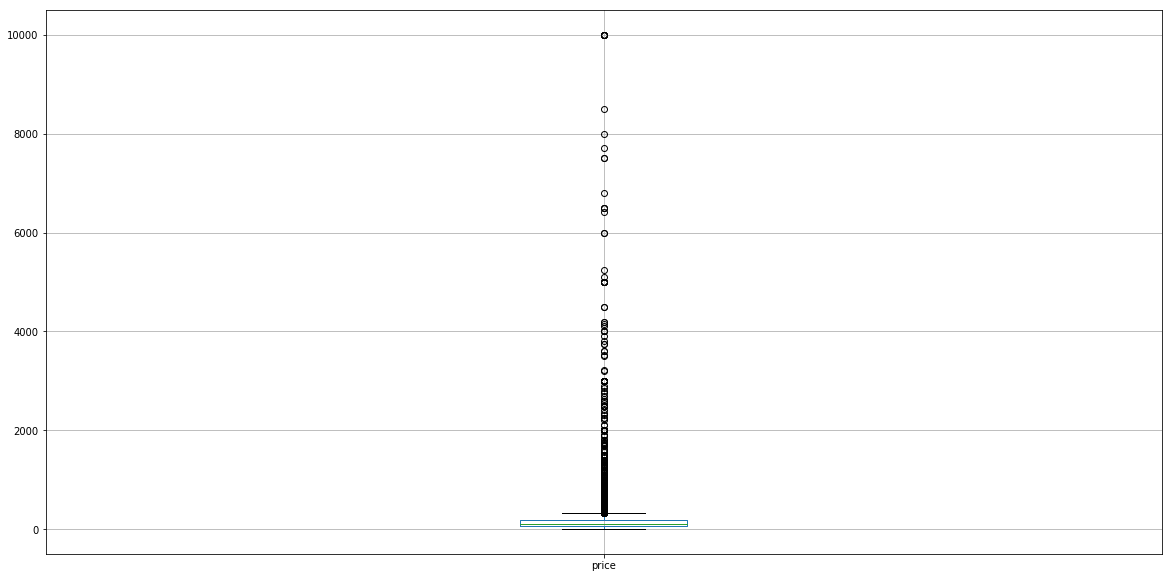

In [74]:
plt.figure(figsize=(20,10))
data.boxplot(column='price', return_type='axes')
plt.show()

As it's possible to see we have many prices which are above average by a large amount. Therefore, to compensate that by looking at he mean we proably have some low prices to bring down the average, and both of these explain well the high standard deviation we see in the variable price.

In [34]:
data.groupby('neighbourhood')['price'].mean()

neighbourhood
Allerton            87.595238
Arden Heights       67.250000
Arrochar           115.000000
Arverne            171.779221
Astoria            117.187778
                      ...    
Windsor Terrace    138.993631
Woodhaven           67.170455
Woodlawn            60.090909
Woodrow            700.000000
Woodside            85.097872
Name: price, Length: 221, dtype: float64

Considering not only the neighbourhood but also the neighbourhood group: 

In [36]:
data.groupby(['neighbourhood_group','neighbourhood'])['price'].mean()

neighbourhood_group  neighbourhood
Bronx                Allerton          87.595238
                     Baychester        75.428571
                     Belmont           77.125000
                     Bronxdale         57.105263
                     Castle Hill       63.000000
                                         ...    
Staten Island        Tottenville      144.857143
                     West Brighton     80.555556
                     Westerleigh       71.500000
                     Willowbrook      249.000000
                     Woodrow          700.000000
Name: price, Length: 221, dtype: float64

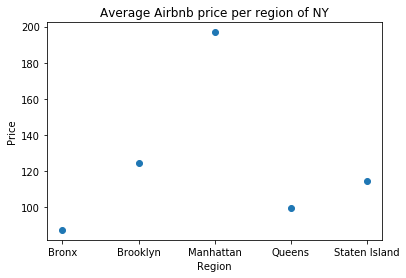

In [4]:
plt.plot(data.groupby(['neighbourhood_group'])['price'].mean().keys(),data.groupby(['neighbourhood_group'])['price'].mean().values,'o')
plt.title('Average Airbnb price per region of NY')
plt.ylabel('Price')
plt.xlabel('Region')
plt.show()

As expected, we can see that the average price in Manhattan is way higher than in other regions, as it's where most
touristic attractions are.

### Regions colored by price

In [59]:
regions_dict = {value: i for i,value in enumerate(data.neighbourhood_group.unique())}
reverse_regions_dict = {i:v for v,i in regions_dict.items()}
data = data.applymap(lambda s: regions_dict.get(s) if s in regions_dict.keys() else s)

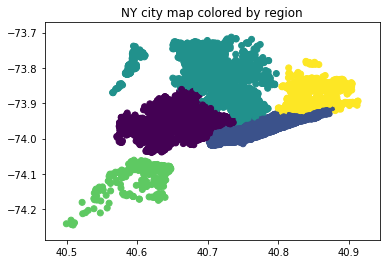

In [60]:
plt.scatter(data.latitude,data.longitude, c = data.neighbourhood_group,cmap='viridis')
plt.title('NY city map colored by region')
plt.show()

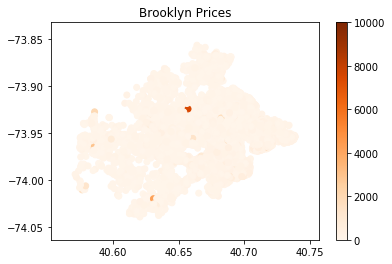

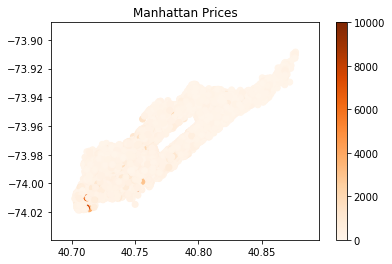

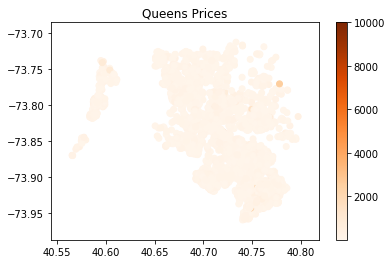

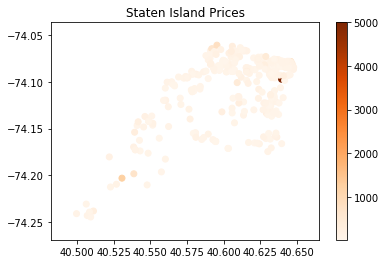

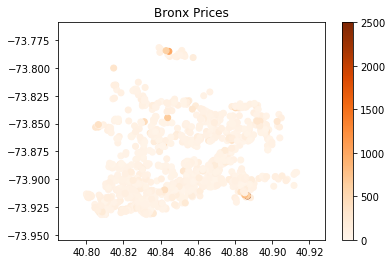

In [62]:
for i,region in enumerate(data.groupby(['neighbourhood_group'])['price'].mean().keys()):
    regiondf  = data[data.neighbourhood_group==region]
    plt.scatter(regiondf.latitude,regiondf.longitude, c = regiondf.price,cmap='Oranges')
    plt.title('{} Prices'.format(reverse_regions_dict[region]))
    plt.colorbar()
    plt.show()

In [42]:
data.groupby('neighbourhood_group')['host_id'].nunique()

neighbourhood_group
Bronx              789
Brooklyn         15966
Manhattan        16578
Queens            3983
Staten Island      256
Name: host_id, dtype: int64

When we look at the amount of owners per region, it is interesting to notice that in the regions where the rent price is
higher, the number of owners is also higher. That is probably due to the fact that as the apartments cost more in such regions
is harder to find owners of two or more houses there.

### Correlation between  some variables 

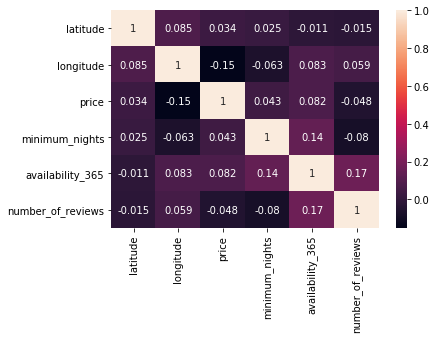

In [27]:
sns.heatmap(data[['latitude','longitude','price','minimum_nights','availability_365','number_of_reviews']].corr(),annot=True)
plt.show()

As seen in the correlation matrix, homes that are more available tend to have more reviews, which is natural,
since as the place is avaliable more days in a year more people can rent it.

In [29]:
data.groupby('room_type')[['price','number_of_reviews']].mean()

,price,number_of_reviews
room_type,,
Entire home/apt,211.794246,22.842418
Private room,89.780973,24.112962
Shared room,70.127586,16.600000


Apart from the fact that entire rooms or apartments cost more than just a romm or a shared room, what is important
to notice is that the difference in the price of a shared room and a private one is about 20 dollars; 

If a locatary is considering transforming his/her private room into a shared one, he must take into consideration,
however, the fact that the average number of reviews (which is a percent of the general guest circulation on the
apartment) drops about 33%, which implies that the overall circulation in the place will probably drop.
